In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
# 2000년 이후의 다우존스 지수 데이터를 야후 파이넨스로 부터 다운로드 한다. 
dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
# 2000년 이후의 KOSPI 데이터를 야후 파이넨스로 부터 다운로드 한다. 
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))

<Figure size 648x360 with 0 Axes>

<Figure size 648x360 with 0 Axes>

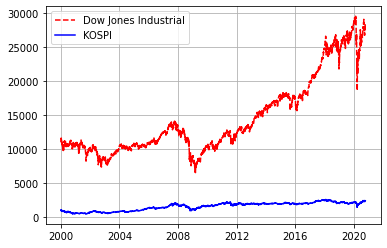

In [12]:
# 다우존스 지수를 붉은 점선으로 출력한다. 
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial')
# KOSPI를 푸른 실선으로 출력한다. 
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [13]:
# 지수화 비교 (Indexation)

# 금일 다우존스 지수를 2000년 1월 4일 다우존스 지수로 나눈 뒤 100을 곱한다. 
d = (dow.Close / dow.Close.loc['2000-01-04']) * 100 

# 금일 KOSPI 지수를 2000년 1월 4일 KOSPI 지수로 나눈 뒤 100을 곱한다. 
k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100

print(d)
print(k)

Date
2000-01-04    100.000000
2000-01-05    101.134038
2000-01-06    102.321619
2000-01-07    104.770260
2000-01-10    105.221624
                 ...    
2020-10-05    255.944904
2020-10-06    252.527162
2020-10-07    257.352627
2020-10-08    258.462370
2020-10-09    259.929834
Name: Close, Length: 5226, dtype: float64
Date
2000-01-04    100.000000
2000-01-05     93.132456
2000-01-06     90.722725
2000-01-07     89.576408
2000-01-10     93.220271
                 ...    
2020-09-29    219.811320
2020-10-05    222.654471
2020-10-06    223.400421
2020-10-07    225.387129
2020-10-08    225.861145
Name: Close, Length: 5112, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
plt.figuredk